# Data Analysis: E-Commerce Public Dataset

## Determining Business Questions

- How is the company's sales and revenue performance on a month-to-month basis?
- What is the distribution of customer transaction locations for the company?  
- What is the relationship between customer locations and seller locations involved in transactions?

## Import All Packages/Library

In [56]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

#### Based on the business questions outlined earlier, the following data is required:
- How is the company's sales and revenue performance on a month-to-month basis?
    1. Orders Dataset: Contains data on purchase dates and quantities (after products are delivered).
    2. Order Payments Dataset: Contains data on payment amounts for orders.  
    Both datasets are linked through the **order ID**.

- What is the distribution of customer transaction locations for the company?  
    Customers Dataset: Contains data on the state locations of customers.

- What is the relationship between customer locations and seller locations involved in transactions?
    1. Customers Dataset: Contains data on customer city locations.
    2. Orders Dataset: Contains order ID (transaction ID) data.
    3. Order Items Dataset: Contains data on sellers involved in transactions.
    4. Sellers Dataset: Contains data on seller city locations.  
    These datasets are linked incrementally.

#### **Step 1:** Displaying the list of files in the "data" folder.
##### Objective: To identify the available datasets.

In [57]:
for filename in os.listdir("./data"):
     print(filename)

customers_dataset.csv
geolocation_dataset.csv
orders_dataset.csv
order_items_dataset.csv
order_payments_dataset.csv
order_reviews_dataset.csv
products_dataset.csv
product_category_name_translation.csv
sellers_dataset.csv


#### **Step 2:** Reading the required data files.
##### Objective: To read the necessary data files so that they can be accessed in subsequent processes.

In [58]:
# Read "orders_dataset.csv"
orders_df = pd.read_csv("./data/orders_dataset.csv", delimiter=",")

# Read "order_payments_dataset.csv"
payments_df = pd.read_csv("./data/order_payments_dataset.csv", delimiter=",")

# Read "customers_dataset.csv"
customers_df = pd.read_csv("./data/customers_dataset.csv", delimiter=",")

# Read "order_items_dataset.csv"
items_df = pd.read_csv("./data/order_items_dataset.csv", delimiter=",")

# Read "sellers_dataset.csv"
sellers_df = pd.read_csv("./data/sellers_dataset.csv", delimiter=",")

#### **Step 3:** Displaying a preview of the required data files.
##### Objective: To understand the contents of the data files and prevent errors in data usage during the analysis process.

Preview of **Order Dataset** ("orders_dataset.csv")

In [59]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Preview of **Order Payments Dataset** ("order_payments_dataset.csv")

In [60]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Preview of **Customers Dataset** ("customers_dataset.csv")

In [61]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Preview of **Order Items Dataset** ("order_items_dataset.csv")

In [62]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Preview of **Sellers Dataset** ("sellers_dataset.csv")

In [63]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### **Step 4:** Displaying the data needed for each business question.
##### Objective: To provide a clear mapping of the data required for each question in the form of a table.

Data Frame of Company's Sales and Revenue Performance

In [64]:
performa_df = pd.merge(
    left = orders_df[["order_id", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]],
    right = payments_df[["order_id", "payment_value"]],
    how = "inner",
    left_on = "order_id",
    right_on = "order_id"
)
performa_df.head()

,order_id,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,179.12


Data Frame of Customer Transaction Locations Distribution

In [65]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Data Frame of Customer and Seller Locations Based on Order ID.  
**Note:** The merging of data frames is performed incrementally to achieve the desired objective, specifically to derive the relationship between customer and seller locations involved in transactions.

In [66]:
# Merge customers_df and orders_df based on customer_id
combine_custToOrder_df = pd.merge(
    left = customers_df[["customer_id", "customer_city"]],
    right = orders_df[["customer_id","order_id","order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]],
    how = "inner",
    on = "customer_id"
)
# Merge previous data frame and items_df based on order_id
combine_ToItems_df = pd.merge(
    left = combine_custToOrder_df,
    right = items_df[["order_id","seller_id"]],
    how = "inner",
    on = "order_id"
)
# Merge previous data frame and sellers_df based on seller_id
combine_ToSellers_df = pd.merge(
    left = combine_ToItems_df,
    right = sellers_df[["seller_id","seller_city"]],
    how = "inner",
    on = "seller_id"
)
custSellerLoc_df = combine_ToSellers_df
custSellerLoc_df.head()

,customer_id,customer_city,order_id,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_city
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,00e7ee1b050b8499577073aeb2a297a1,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,7c67e1448b00f6e969d365cea6b010ab,itaquaquecetuba
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,29150127e6685892b6eab3eec79f59c7,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,b8bc237ba3788b23da09c0f1f3a3288c,itajai
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,7c67e1448b00f6e969d365cea6b010ab,itaquaquecetuba
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,951670f92359f4fe4a63112aa7306eba,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,7c67e1448b00f6e969d365cea6b010ab,itaquaquecetuba
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,4a3ca9315b744ce9f8e9374361493884,ibitinga


#### **Step 5:** Combining all data frames from Step 4.
##### Objective: To streamline data access and ensure consistency in the data used for each business question.
**Note:** The customer data required to answer question 2 is included in custSellerLoc_df, so only the tables for questions 1 and 3 need to be merged.

In [67]:
df = pd.merge(
    left = performa_df,
    # Not all column included to prevent duplicated columns.
    right = custSellerLoc_df[["order_id", "customer_id", "customer_city", "seller_id", "seller_city"]], 
    how = "inner",
    on = "order_id",
)
df.head()

,order_id,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,customer_id,customer_city,seller_id,seller_city
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,18.12,9ef432eb6251297304e76186b10a928d,sao paulo,3504c0cb71d7fa48d967e0e4c94d59d9,maua
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.00,9ef432eb6251297304e76186b10a928d,sao paulo,3504c0cb71d7fa48d967e0e4c94d59d9,maua
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,18.59,9ef432eb6251297304e76186b10a928d,sao paulo,3504c0cb71d7fa48d967e0e4c94d59d9,maua
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,141.46,b0830fb4747a6c6d20dea0b8c802d7ef,barreiras,289cdb325fb7e7f891c38608bf9e0962,belo horizonte
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,179.12,41ce2a54c0b03bf3443c3d931a367089,vianopolis,4869f7a5dfa277a7dca6462dcf3b52b2,guariba


**Insights:**
- To address the outlined business questions, the required datasets are **orders**, **order payments**, **customers**, **order items**, and **sellers**.
- Accordingly, five CSV files are utilized: "orders_dataset.csv," "order_payments_dataset.csv," "customers_dataset.csv," "order_items_dataset.csv," and "sellers_dataset.csv". These files are all located in the same folder, named "data."
- After reading the files, their contents are displayed to avoid errors in data usage during the analysis process.
- The data required for each question is presented in the form of a table (data frame), utilizing the **merge()** function to combine two tables at a time.
- Finally, all data frames are merged to simplify data access and ensure consistency in the data used to answer each business question.

### Assessing Data
#### This process involves evaluating the feasibility and quality of the data.

#### **Step 1:** Displaying information about the **df** data.
##### Objective: To examine the data types of each column in the **df** data frame.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117601 non-null  object 
 1   order_delivered_carrier_date   116356 non-null  object 
 2   order_delivered_customer_date  115034 non-null  object 
 3   order_estimated_delivery_date  117601 non-null  object 
 4   payment_value                  117601 non-null  float64
 5   customer_id                    117601 non-null  object 
 6   customer_city                  117601 non-null  object 
 7   seller_id                      117601 non-null  object 
 8   seller_city                    117601 non-null  object 
dtypes: float64(1), object(8)
memory usage: 8.1+ MB


#### **Step 2:** Identifying *missing values* in the **df** data.
##### Objective: To show the number and location of missing data that needs to be processed during the data cleaning stage.

In [69]:
df.isna().sum()

order_id                            0
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
payment_value                       0
customer_id                         0
customer_city                       0
seller_id                           0
seller_city                         0
dtype: int64

#### **Step 3:** Identifying *duplicated values* in the **df** data.
##### Objective: To show the number of duplicate records that need to be processed during the data cleaning stage.

In [70]:
df.duplicated().sum()

13720

#### **Step 4:** Identifying *inaccurate values* in the **df** data.
##### Objective: To check for values that are not suitable for use and need to be addressed during the data cleaning stage.

In [71]:
df.describe()

,payment_value
count,117601.000000
mean,172.686752
std,267.592290
min,0.000000
25%,60.870000
50%,108.210000
75%,189.260000
max,13664.080000


**Insights:**
- This process evaluates the feasibility of the data. If any data is deemed unsuitable, it will be handled during the cleaning stage.
- The process consists of four steps: checking data types, identifying missing values, finding duplicated values, and detecting inaccurate values.
- The data type check revealed that the "order_delivered_customer_date" field has fewer entries, indicating the presence of missing values. Additionally, the data types for "order_delivered_carrier_date," "order_delivered_customer_date," and "order_estimated_delivery_date" should be interpreted as **datetime** instead of object.
- The *missing values* check showed that **1,245** entries in "order_delivered_carrier_date" and **2,567** entries in "order_delivered_customer_date" are missing. These findings align with the information provided earlier.
- The *duplicated values* check revealed **13,720** duplicated rows.
- The *inaccurate values* check uncovered anomalies, such as a **minimum "payment_value" of 0**, which is highly unlikely since transactions generally involve a positive amount.

### Cleaning Data

#### **Step 1:** Addressing *inappropriate data types* in **df**.
##### Objective: To ensure all data types in df are appropriate, enabling smooth analysis.

In [72]:
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'], errors='coerce')
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'], errors='coerce')
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'], errors='coerce')

#### **Step 2:** Removing *duplicate data* in **df**.
##### Objective: To eliminate and ensure no duplicate data exists in **df**.

In [73]:
# Dropping duplicate data
df.drop_duplicates(inplace=True)

# Recounting the amount of duplicated data
df.duplicated().sum()               

0

#### **Step 3:** Handling *missing values* in **df**.
##### Objective: To determine the appropriate handling of and address missing values in **df**.

In this analysis, a product is considered sold only if it has been delivered to the customer. Thus, although there are two variables with missing values, the focus here is on the data indicating the delivery date to the customer.

The check for data with missing values produced the following result.

In [74]:
df[df.order_delivered_customer_date.isna()]

,order_id,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,customer_id,customer_city,seller_id,seller_city
8,136cce7faa42fdb2cefd53fdc79a6098,NaT,NaT,2017-05-09,65.95,ed0271e0b7da060a393796590e7b737a,santa rosa,dc8798cbf453b7e0f98745e396cc5616,sao paulo
51,ee64d42b8cf066f35eac1cf57de1aa85,2018-06-05 14:32:00,NaT,2018-06-28,22.36,caded193e8e47b8362864762a83db3c5,jundiai,e9779976487b77c6d4ac45f75ec7afe9,praia grande
125,0760a852e4e9d89eb77bf631eaaf1c84,NaT,NaT,2018-08-21,50.35,d2a79636084590b7465af8ab374a8cf5,santo amaro da imperatriz,28405831a29823802aa22c084cfd0649,sao paulo
155,15bed8e2fec7fdbadb186b57c46c92f2,NaT,NaT,2017-10-03,138.28,f3f0e613e0bdb9c7cee75504f0f90679,sao paulo,fa74b2f3287d296e9fbd2cc80f2d1cf1,presidente prudente
192,6942b8da583c2f9957e990d028607019,2018-01-11 19:39:23,NaT,2018-02-07,69.12,52006a9383bf149a4fb24226b173106f,paracatu,cc419e0650a3c5ba77189a1882b7556a,santo andre
...,...,...,...,...,...,...,...,...,...
117214,274a7f7e4f1c17b7434a830e9b8759b1,2018-07-04 13:51:00,NaT,2018-07-24,48.63,670af30ca5b8c20878fecdafa5ee01b9,aracaju,92eb0f42c21942b6552362b9b114707d,sao paulo
117246,aea0db338150b526dde24f6fd953a5ed,NaT,NaT,2018-01-26,113.34,379a02efdc6a56bd27f99b95fc2f6c06,aquidauana,b2ba3715d723d245138f291a6fe42594,sao paulo
117255,6560fb10610771449cb0463c5ba12199,NaT,NaT,2017-10-27,333.62,0d07d0a588caf93cc66b7a8aff86d2fe,curitiba,897060da8b9a21f655304d50fd935913,ribeirao preto
117298,636cdd02667dc8d76d9296bf20a6890a,2018-02-20 19:18:58,NaT,2018-03-14,224.71,c162256b133c76f79181ce61d66545db,taubate,a1043bafd471dff536d0c462352beb48,ilicinea


It was decided not to drop the affected data because a **significant amount** of information is still valuable. Instead, **imputation** was applied by filling in the missing values with the **estimated delivery dates**. The rationale for this decision is that the "order_estimated_delivery_date" field has no missing values and is closely related to the actual delivery date.

In [75]:
df['order_delivered_customer_date'].fillna(
    value=df['order_estimated_delivery_date'], 
    inplace=True
)

C:\Users\Grace\AppData\Local\Temp\ipykernel_25156\1336736136.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['order_delivered_customer_date'].fillna(


Afterward, a recheck is carried out to see if there are still missing values in the "order_delivered_customer_date" data.

In [76]:
df.order_delivered_customer_date.isna().sum()

0

The recheck confirmed that no missing values remained in the "order_delivered_customer_date" field, allowing the process to proceed to the next stage.

#### **Step 4:** Handling *inaccurate values* in **df**.
##### Objective: To determine the appropriate handling of and address inaccurate values in **df**.

As previously described in the assessing data section, the inaccurate values in this analysis pertain to "payment_value," which should always be greater than 0.

The check for data with inaccurate values produced the following results.

In [77]:
df[df.payment_value == df.payment_value.min()]

,order_id,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,customer_id,customer_city,seller_id,seller_city
502,45ed6e85398a87c253db47c2d9f48216,2017-06-09 08:35:18,2017-06-22 17:44:53,2017-07-10,0.0,8eab8f9b3c744b76b65f7a2c0c8f2d6c,goiania,cc419e0650a3c5ba77189a1882b7556a,santo andre
30662,fa65dad1b0e818e3ccc5cb0e39231352,2017-04-24 11:31:17,2017-05-18 00:00:00,2017-05-18,0.0,9af2372a1e49340278e7c1ef8d749f34,cuiaba,06532f10282704ef4c69168b914b77be,paincandu
38267,6ccb433e00daae1283ccc956189c82ae,2017-10-27 19:53:03,2017-11-08 18:47:00,2017-11-22,0.0,843b211abe7b0264dd4a69eafc5bdf43,petropolis,da20530872245d6cd9d2f5725613c430,igrejinha
101309,b23878b3e8eb4d25a158f57d96331b18,2017-05-29 04:49:37,2017-06-07 08:53:10,2017-06-29,0.0,648121b599d98c420ef93f6135f8c80c,anchieta,e49c26c3edfa46d227d5121a6b6e4d37,brejao
114647,8bcbe01d44d147f901cd3192671144db,2018-01-30 22:43:30,2018-02-02 21:26:42,2018-02-21,0.0,f2def7f64f36952f2f5a9791f0285f34,rio de janeiro,3d871de0142ce09b7081e2b9d1733cb1,campo limpo paulista


Since the amount of inaccurate values is **minimal** compared to the total dataset, it was decided to **drop** these data.

In [78]:
df.drop(df[df.payment_value == 0].index, inplace=True)

Afterward, a recheck is carried out to see if there are still inaccurate values in the "order_delivered_customer_date" data.

In [79]:
df[df.payment_value == 0]

,order_id,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,customer_id,customer_city,seller_id,seller_city


The recheck confirmed that no inaccurate values remained in "payment_value", allowing the process to proceed to the next stage.

**Insights:**
- This process cleans the data by removing or addressing records deemed unsuitable for analysis.
- It includes **correcting** *data types* for "order_delivered_carrier_date," "order_delivered_customer_date," and "order_estimated_delivery_date," changing them from object to **datetime**.
- *Duplicate values* were **removed** in the next step.
- The main analysis data with missing values, "order_delivered_customer_date", was handled by **imputing** the *missing values* with the corresponding "order_estimated_delivery_date." This decision was based on the availability and relevance of the estimated delivery data.
- Finally, *inaccurate values* in "payment_value" were addressed by **dropping** the affected data due to their minimal number compared to the total dataset.

## Exploratory Data Analysis (EDA)

### Exploring Dataset **df**
#### Objective: Explore the dataset values to gain general insights.

Dataset Overview

In [80]:
df.head()

,order_id,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,customer_id,customer_city,seller_id,seller_city
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,18.12,9ef432eb6251297304e76186b10a928d,sao paulo,3504c0cb71d7fa48d967e0e4c94d59d9,maua
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.00,9ef432eb6251297304e76186b10a928d,sao paulo,3504c0cb71d7fa48d967e0e4c94d59d9,maua
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,18.59,9ef432eb6251297304e76186b10a928d,sao paulo,3504c0cb71d7fa48d967e0e4c94d59d9,maua
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,141.46,b0830fb4747a6c6d20dea0b8c802d7ef,barreiras,289cdb325fb7e7f891c38608bf9e0962,belo horizonte
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,179.12,41ce2a54c0b03bf3443c3d931a367089,vianopolis,4869f7a5dfa277a7dca6462dcf3b52b2,guariba


Dataset Statistic Parameters

In [81]:
df.describe(include="all")

,order_id,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,customer_id,customer_city,seller_id,seller_city
count,103876,102824,103876,103876,103876.000000,103876,103876,103876,103876
unique,98665,NaN,NaN,NaN,NaN,98665,4110,3095,611
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,NaN,NaN,NaN,9af2372a1e49340278e7c1ef8d749f34,sao paulo,4a3ca9315b744ce9f8e9374361493884,sao paulo
freq,24,NaN,NaN,NaN,NaN,24,16205,1929,25594
mean,NaN,2018-01-04 01:30:12.054326016,2018-01-12 21:28:18.474431232,2018-01-23 21:54:50.030420992,155.789079,NaN,NaN,NaN,NaN
min,NaN,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-20 00:00:00,0.010000,NaN,NaN,NaN,NaN
25%,NaN,2017-09-14 21:03:34.249999872,2017-09-21 21:13:16.750000128,2017-10-03 00:00:00,57.690000,NaN,NaN,NaN,NaN
50%,NaN,2018-01-23 21:11:24,2018-02-01 16:31:44,2018-02-15 00:00:00,101.460000,NaN,NaN,NaN,NaN
75%,NaN,2018-05-08 11:31:00,2018-05-15 16:54:40.500000,2018-05-25 00:00:00,174.050000,NaN,NaN,NaN,NaN
max,NaN,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,13664.080000,NaN,NaN,NaN,NaN


### Exploring Company's Sales and Revenue Data in  **df**
#### Objective: Explore the company's sales and revenue values over time.

Total Sales and Transaction Values (based on Payment Transactions)

In [82]:
exp_order = df.groupby(df["order_delivered_customer_date"].dt.to_period('M')).agg({
    "order_id": "nunique",
    "payment_value": "sum",
})
exp_order

,order_id,payment_value
order_delivered_customer_date,,
2016-10,211,35952.74
2016-11,72,14990.56
2016-12,28,7023.02
2017-01,283,38298.21
2017-02,1360,231100.82
2017-03,2506,416900.13
2017-04,1926,326530.89
2017-05,3858,628468.91
2017-06,3332,525425.66


Statistical Parameters for Total Sales (based on Payment Transactions)

In [83]:
pd.set_option('display.float_format', '{:,.2f}'.format)
exp_order.describe()

,order_id,payment_value
count,25.00,25.00
mean,"3,946.60","647,309.86"
std,"2,863.80","473,045.98"
min,3.00,347.95
25%,"1,360.00","231,100.82"
50%,"4,072.00","660,784.70"
75%,"6,690.00","1,030,388.16"
max,"8,499.00","1,431,304.03"


In [84]:
pd.reset_option('display.float_format')

### Exploring Customer Location Data in **df**
#### Objective: Examine customer location data owned by the company.

Customer Distribution by City

In [85]:
exp_cust = df.groupby(by=["customer_city"]).agg({
    "customer_id": "nunique",
})
exp_cust = exp_cust.sort_values(by=("customer_id"), ascending=False)
exp_cust

,customer_id
customer_city,
sao paulo,15402
rio de janeiro,6834
belo horizonte,2750
brasilia,2116
curitiba,1510
...,...
ibarama,1
rio espera,1
rio dos indios,1


Statistical Parameters for Customer Distribution by City

In [86]:
exp_cust.describe()

,customer_id
count,4110.000000
mean,24.006083
std,277.207180
min,1.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,15402.000000


### Exploring Customer and Seller Location Data in **df**
#### Objective: Explore the relationship between customer and seller locations involved in transactions.

Number of **Customers** and **Seller Cities** Transacting with The Customers

In [87]:
exp_loc = df.groupby(by=["customer_city"]).agg({    
    # Set customer_city as the primary variable
    # Count the unique customer_id for each customer_city
    "customer_id": "nunique",   
    # Count the unique seller_city for each customer_city                    
    "seller_city": "nunique",                       
})
exp_loc = exp_loc.sort_values(by=("seller_city"), ascending=False)
exp_loc

,customer_id,seller_city
customer_city,,
sao paulo,15402,426
rio de janeiro,6834,345
belo horizonte,2750,290
brasilia,2116,251
curitiba,1510,228
...,...,...
retirolandia,1,1
guimaraes,1,1
ressaquinha,1,1


Statistical Parameters for the Number of **Customers** and **Seller Cities** Transacting with The Customers

In [88]:
exp_loc.describe()

,customer_id,seller_city
count,4110.000000,4110.000000
mean,24.006083,8.801703
std,277.207180,20.664098
min,1.000000,1.000000
25%,1.000000,1.000000
50%,3.000000,3.000000
75%,9.000000,7.000000
max,15402.000000,426.000000


Correlation Between the Number of **Customers** and **Seller Cities** Transacting with The Customers

In [89]:
loc_corr = pd.merge(
    # Use the calculated customer_id variable from the previous DataFrame
    left = exp_loc.customer_id,      
    # Use the calculated seller_city variable from the previous DataFrame
    right = exp_loc.seller_city,      
    how = "inner",
    on = "customer_city"
)
# Compute the correlation between the number of customer_id in a city 
# and the number of seller_city transacting with customers
loc_corr.corr()                     

,customer_id,seller_city
customer_id,1.000000,0.627442
seller_city,0.627442,1.000000


**Insights:**
- Dataset (**df**) Exploration:
    1. A total of 103,876 transactions occurred during the analysis period.
    2. There were 98,665 customers distributed across 4,110 cities.
    3. A total of 3,095 sellers operated in 611 cities.
- Company's Sales and Revenue Exploration:
    1. Monthly transactions ranged between 3-8,499, with an average of 3,947 transactions per month.
    2. Monthly sales values ranged between 347.95-1,431,304.03, with an average monthly sales value of 647,309.86.
- Customer Location Exploration:
    1. Customers were distributed across 4,110 cities, with an average of 24 customers per city.
    2. The city with the highest number of customers was Sao Paulo, with 15,402 customers.
- Customer and Seller Location Exploration:
    1. Sao Paulo had the highest concentration of customer transactions with sellers from 426 different cities.
    2. On average, customers in each city transacted with sellers from 9 different cities.
    3. A positive correlation was observed between the number of customers in a city and the diversity of seller cities transacting with them. This indicates that the larger the customer base in a city, the more varied the seller locations tend to be.


## Visualization & Explanatory Analysis

### **Question 1:** How is the company's sales and revenue performance on a month-to-month basis?
#### Objective: Compare the company's sales and revenue values on a monthly basis to assess its growth and development.

#### **Step 1**: Resampling the Data
##### Objective: Group the data into resampled intervals, making it easier to present aggregate data by specific time intervals.

In [90]:
vis_order = df.resample(rule='M', on='order_delivered_customer_date').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})

C:\Users\Grace\AppData\Local\Temp\ipykernel_25156\438341529.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  vis_order = df.resample(rule='M', on='order_delivered_customer_date').agg({


#### **Step 2**: Indexing and Renaming Data
##### Objective: To enhance data readability and avoid misconceptions regarding data labels.

In [91]:
vis_order.index = vis_order.index.strftime('%Y-%m')
vis_order = vis_order.reset_index()
vis_order.rename(columns={
    "order_delivered_customer_date": "order_date",
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)

#### **Step 3**: Data Visualization
##### Objective: To present the data as a line chart for identifying trends in the company's sales and revenue performance on a monthly basis.

**Plot:** Monthly Sales Trends

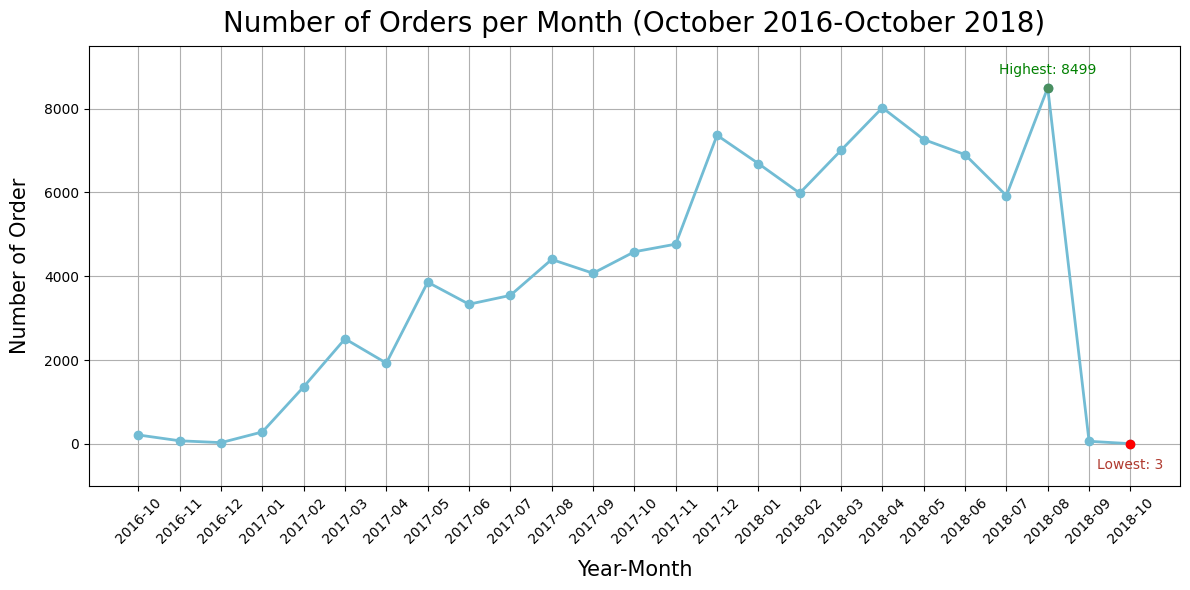

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(vis_order["order_date"], vis_order["order_count"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Number of Orders per Month (October 2016-October 2018)", loc="center", fontsize=20, pad=10) 
plt.grid(True)
plt.xlabel("Year-Month", fontsize=15, labelpad=10)
plt.ylabel("Number of Order", fontsize=15, labelpad=10)
plt.xticks(rotation=45, fontsize=10) 
plt.yticks(fontsize=10)
# Adjust y-axis to have a bit of space around the data
plt.ylim(vis_order["order_count"].min() - 1000, vis_order["order_count"].max() + 1000)

# Find highest and lowest values for sales
highest_sales = vis_order["order_count"].max()
lowest_sales = vis_order["order_count"].min()
highest_sales_date = vis_order[vis_order["order_count"] == highest_sales]["order_date"].values[0]
lowest_sales_date = vis_order[vis_order["order_count"] == lowest_sales]["order_date"].values[0]

# Highlight the highest and lowest point
plt.scatter(highest_sales_date, highest_sales, color="#4A8F5F", zorder=5)
plt.annotate(f"Highest: {highest_sales}", (highest_sales_date, highest_sales), 
             textcoords="offset points", xytext=(0, 10), ha="center", fontsize=10, color="green")
plt.scatter(lowest_sales_date, lowest_sales, color="red", zorder=5)
plt.annotate(f"Lowest: {lowest_sales}", (lowest_sales_date, lowest_sales), 
             textcoords="offset points", xytext=(0, -18), ha="center", fontsize=10, color="#B03A2F")

plt.tight_layout()
plt.show()

**Plot:** Monthly Revenues Trends

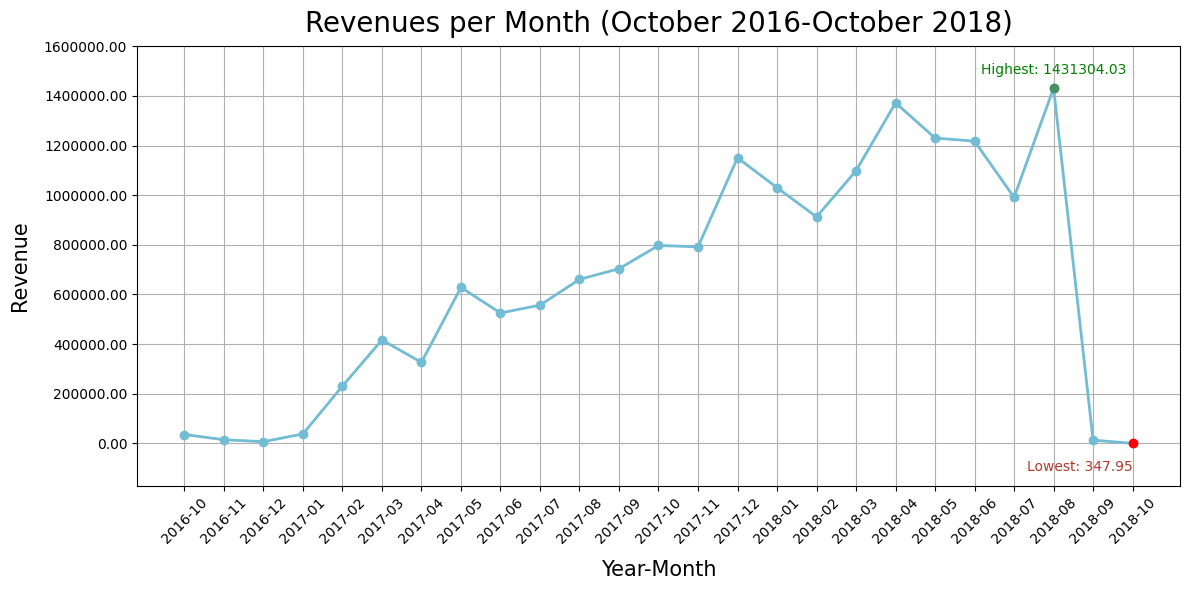

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(vis_order["order_date"], vis_order["revenue"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Revenues per Month (October 2016-October 2018)", loc="center", fontsize=20, pad=10) 
plt.grid(True)
plt.xlabel("Year-Month", fontsize=15, labelpad=10)
plt.ylabel("Revenue", fontsize=15, labelpad=10)
plt.xticks(rotation=45, fontsize=10) 
plt.yticks(fontsize=10)
# Y-axis in float with 2 digits of decimal
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
# Adjust y-axis to have a bit of space around the data
plt.ylim(vis_order["revenue"].min() - 170000, vis_order["revenue"].max() + 170000)

# Find highest and lowest values for revenues
highest_revenues = vis_order["revenue"].max()
lowest_revenues = vis_order["revenue"].min()
highest_revenues_date = vis_order[vis_order["revenue"] == highest_revenues]["order_date"].values[0]
lowest_revenues_date = vis_order[vis_order["revenue"] == lowest_revenues]["order_date"].values[0]

# Highlight the highest and lowest point
plt.scatter(highest_revenues_date, highest_revenues, color="#4A8F5F", zorder=5)
plt.annotate(f"Highest: {highest_revenues:.2f}", (highest_revenues_date, highest_revenues), 
             textcoords="offset points", xytext=(0, 10), ha="center", fontsize=10, color="green")
plt.scatter(lowest_revenues_date, lowest_revenues, color="red", zorder=5)
plt.annotate(f"Lowest: {lowest_revenues:.2f}", (lowest_revenues_date, lowest_revenues), 
             textcoords="offset points", xytext=(0, -20), ha="right", fontsize=10, color="#B03A2F")

plt.tight_layout()
plt.show()

### **Question 2:** What is the distribution of customer transaction locations for the company?  
#### Objective: Assess the geographic spread of customers who are aware of the company's products (e-commerce) based on location.

#### **Step 1**: Grouping the Data
##### Objective: Group the data to make it easier to present during the visualization phase.

In [94]:
vis_cust = df.groupby(by="customer_city").customer_id.nunique().reset_index()
vis_cust.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

#### **Step 2**: Categorizing Data into *Top 9 Cities and Others*
##### Objective: Summarize the visualization for more straightforward analysis.

In [95]:
# Insert the top 9 data with the highest count into the 'top_cities' variable
top_cities = vis_cust.sort_values(by="customer_count", ascending=False).head(9)

# Insert the remaining data into the 'others_cities' variable
others_cities = vis_cust.sort_values(by="customer_count", ascending=False).iloc[9:]["customer_count"].sum()

# Create the 'others_cities' variable in a data frame format
others_df = pd.DataFrame({
    "customer_city": ["Others"],
    "customer_count": [others_cities]
})

# Combine the 'top_cities' and 'others_cities' DataFrames to present them together in the next stage
top_cities = pd.concat([top_cities, others_df], ignore_index=True)

#### **Step 3**: Data Visualization
##### Objective: To present the data as a horizontal bar plot for identifying the distribution of customers by city.

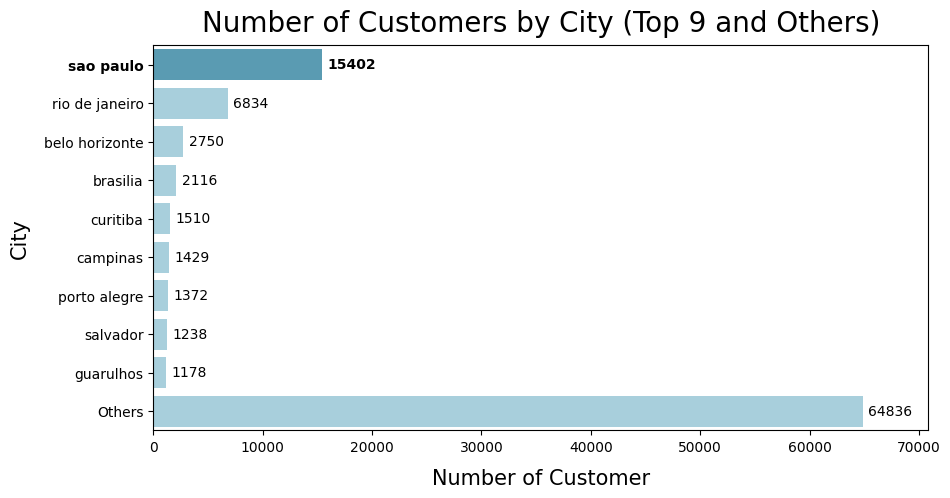

In [96]:
plt.figure(figsize=(10, 5))

plt.title("Number of Customers by City (Top 9 and Others)", loc="center", fontsize=20, pad=10)
plt.xlabel("Number of Customer", fontsize=15, labelpad=10)
plt.ylabel("City", fontsize=15, labelpad=10)
plt.tick_params(axis='y', labelsize=10)
# Adjust x-axis to have a bit of space around the data
plt.xlim(0,top_cities["customer_count"].max() + 6000)

vis_custCity = sns.barplot(
    x="customer_count", 
    y="customer_city",
    data=top_cities,
    color='#A0D3E4'
)

# Highlight the top first city
vis_custCity.patches[0].set_facecolor('#5A9BB2')
# Annotate the bars with customer count values
for index, value in enumerate(top_cities["customer_count"]):
    vis_custCity.text(value + 500, index, f'{value}', va='center', 
                      # Apply bold only for the top first city (index 0)
                      fontweight='bold' if index == 0 else 'normal')
plt.gca().get_yticklabels()[0].set_fontweight('bold')

plt.show()

### **Question 3:** What is the relationship between customer locations and seller locations involved in transactions?
#### Objective: Analyze the impact of customer and seller locations in transactions.

#### **Step 1**: Grouping the Data
##### Objective: Group the data to make it easier to present during the visualization phase.

In [97]:
vis_loc = df.groupby(by='customer_city').agg({
    "customer_id": "nunique",
    "seller_city": "nunique"
})

#### **Step 2**: Indexing and Renaming Data
##### Objective: Enhance data readability and avoid misconceptions regarding data labels.

In [98]:
vis_loc.nunique().reset_index()
vis_loc.rename(columns={
    # Number of customers from a particular city
    "customer_id": "customer_count",    
    # Number of seller locations that have transacted with customers from a particular city
    "seller_city": "city_of_sellers"
}, inplace=True)

#### **Step 3**: Data Visualization
##### Objective: Present the data as a scatter plot with a *regression* line for identifying relationships between customer location groups and the diversity of seller locations involved in transactions.

In [99]:
# Calculating the regression line
slope, intercept = np.polyfit(vis_loc["customer_count"], vis_loc["city_of_sellers"], 1)
regression_line = slope * vis_loc["customer_count"] + intercept

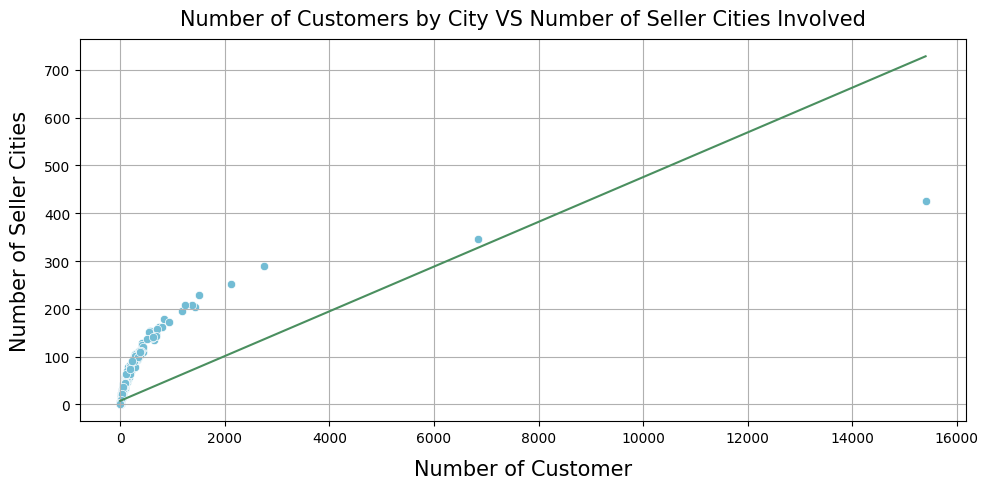

In [102]:
plt.figure(figsize=(10, 5))

plt.title("Number of Customers by City VS Number of Seller Cities Involved", loc="center", fontsize=15, pad=10)
plt.grid(True)
plt.xlabel("Number of Customer", fontsize=15, labelpad=10)
plt.ylabel("Number of Seller Cities", fontsize=15, labelpad=10)

# Creating a scatter plot
sns.scatterplot(
    x="customer_count",
    y="city_of_sellers",
    data=vis_loc,
    color='#72BCD4'
)
# Adding the regression line to the plot
sns.lineplot(
    x=vis_loc["customer_count"], 
    y=regression_line, 
    color='#4A8F5F'
)

plt.tight_layout()
plt.show()

**Insight:**
- Visualization of the company's sales and revenue over the last two years shows a consistent upward trend in sales and revenue on a month-to-month basis. A line chart was used to highlight the trend.
- Visualization of customer location data compares the top 9 cities with the highest number of customers: Sao Paulo, Rio de Janeiro, Belo Horizonte, Brasilia, Curitiba, Campinas, Porto Alegre, Salvador, and Guarulhos. All other cities are grouped under "Others". A horizontal bar chart was used to compare customer counts across cities.
- Visualization of the relationship between customer and seller locations reveals a linear correlation: the higher the number of customers in a city, the more diverse the seller locations involved. A scatter plot with a regression line was used to illustrate the relationship between the two variables.

## Conclusion

- **How is the company's sales and revenue performance on a month-to-month basis?**  
    The company's sales and revenue performance shows a tending upward trend month to month, indicating improved performance and increasing customer trust.
- **What is the distribution of customer transaction locations for the company?**  
    The company's customers are distributed across 4,110 cities, with an average of 24 customers per city. Sao Paulo has the highest number of customers, totaling 15,402.
- **What is the relationship between customer locations and seller locations involved in transactions?**  
    The relationship between customer and seller locations shows a positive correlation: the higher the number of customers in a city, the more diverse the seller locations transacting with those customers.

In [101]:
df.to_csv("main_data.csv", index=False)